In [1]:
import pandas as pd

path="data/heart.csv"
df=pd.read_csv(path)
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [3]:
for col in df.select_dtypes("object").columns:
    print(df[col].value_counts())
    print("\n")

M    725
F    193
Name: Sex, dtype: int64


ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64


Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64


N    547
Y    371
Name: ExerciseAngina, dtype: int64


Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64




In [4]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.shape

(918, 12)

In [7]:
df.columns 

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [8]:
column_value_counts = {}

for column in df.columns:
    column_value_counts[column] = df[column].value_counts()
        
for column, values in column_value_counts.items():
    print(f"Value Counts for Column '{column}':\n{values}\n")

Value Counts for Column 'Age':
54    51
58    42
55    41
56    38
57    38
52    36
59    35
62    35
51    35
53    33
60    32
48    31
61    31
63    30
50    25
41    24
46    24
43    24
64    22
49    21
65    21
47    19
44    19
45    18
42    18
38    16
39    15
67    15
66    13
69    13
40    13
37    11
35    11
68    10
70     7
74     7
34     7
36     6
71     5
32     5
72     4
75     3
29     3
31     2
77     2
33     2
76     2
30     1
73     1
28     1
Name: Age, dtype: int64

Value Counts for Column 'Sex':
M    725
F    193
Name: Sex, dtype: int64

Value Counts for Column 'ChestPainType':
ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

Value Counts for Column 'RestingBP':
120    132
130    118
140    107
110     58
150     55
      ... 
113      1
164      1
117      1
127      1
0        1
Name: RestingBP, Length: 67, dtype: int64

Value Counts for Column 'Cholesterol':
0      172
254     11
223     10
220     10
230      9
     

In [9]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [10]:
df.dtypes.value_counts()

int64      6
object     5
float64    1
dtype: int64

In [11]:
data_types = df.dtypes

# Separate columns by data type
int_columns = data_types[data_types == 'int64'].index
float_columns = data_types[data_types == 'float64'].index
object_columns = data_types[data_types == 'object'].index

print("Unique Values Counts by Data Type:")

# Print columns and their counts for each data type
print("Integer Columns:")
print(df[int_columns].nunique())

print("\nFloat Columns:")
print(df[float_columns].nunique())

print("\nObject Columns:")
print(df[object_columns].nunique())

Unique Values Counts by Data Type:
Integer Columns:
Age              50
RestingBP        67
Cholesterol     222
FastingBS         2
MaxHR           119
HeartDisease      2
dtype: int64

Float Columns:
Oldpeak    53
dtype: int64

Object Columns:
Sex               2
ChestPainType     4
RestingECG        3
ExerciseAngina    2
ST_Slope          3
dtype: int64


EDA

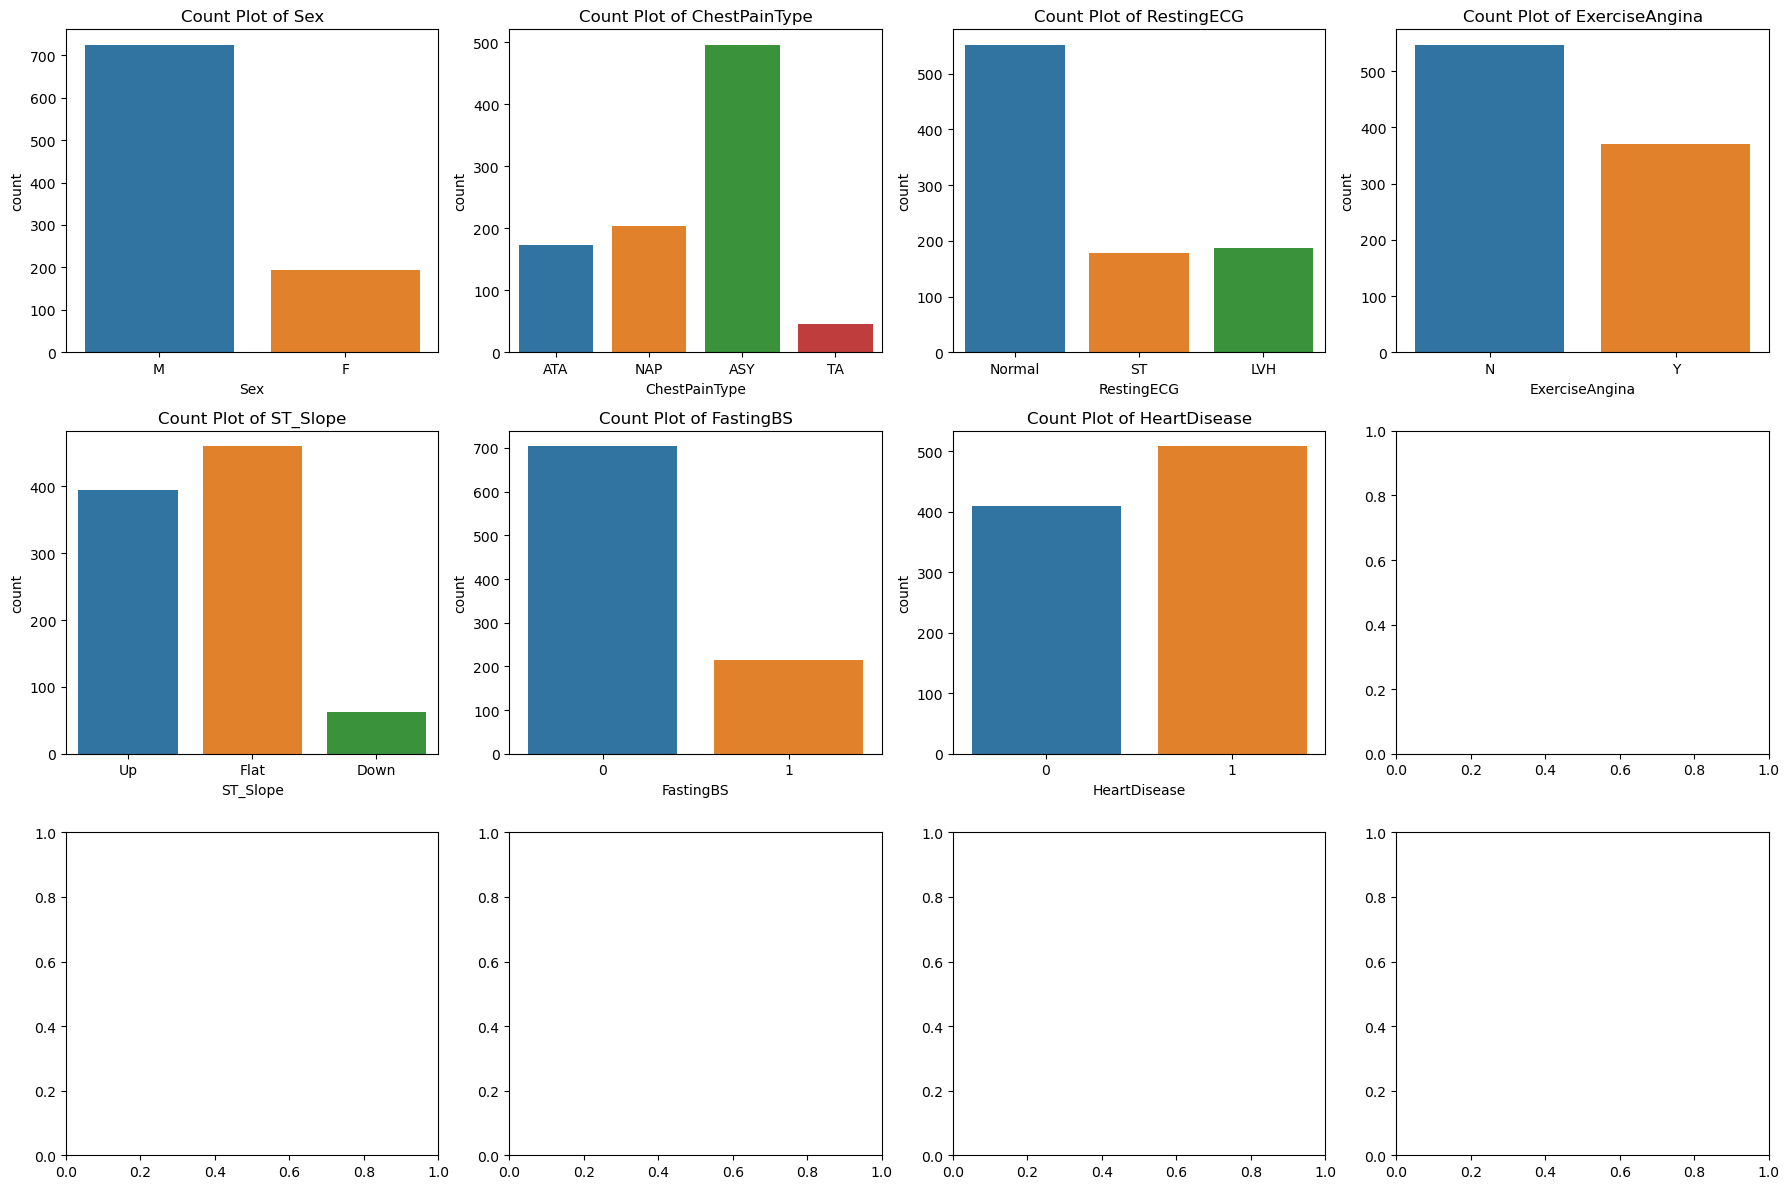

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Categorical columns
categorical_columns = ["Sex", "ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope", "FastingBS", "HeartDisease"]

# Set up subplots
fig, axes = plt.subplots(3, 4, figsize=(18, 12))

# Loop through categorical columns and plot count plots
for i, col in enumerate(categorical_columns):
    sns.countplot(data=df, x=col, ax=axes[i // 4, i % 4])
    axes[i // 4, i % 4].set_title(f"Count Plot of {col}")

plt.tight_layout()
plt.show()


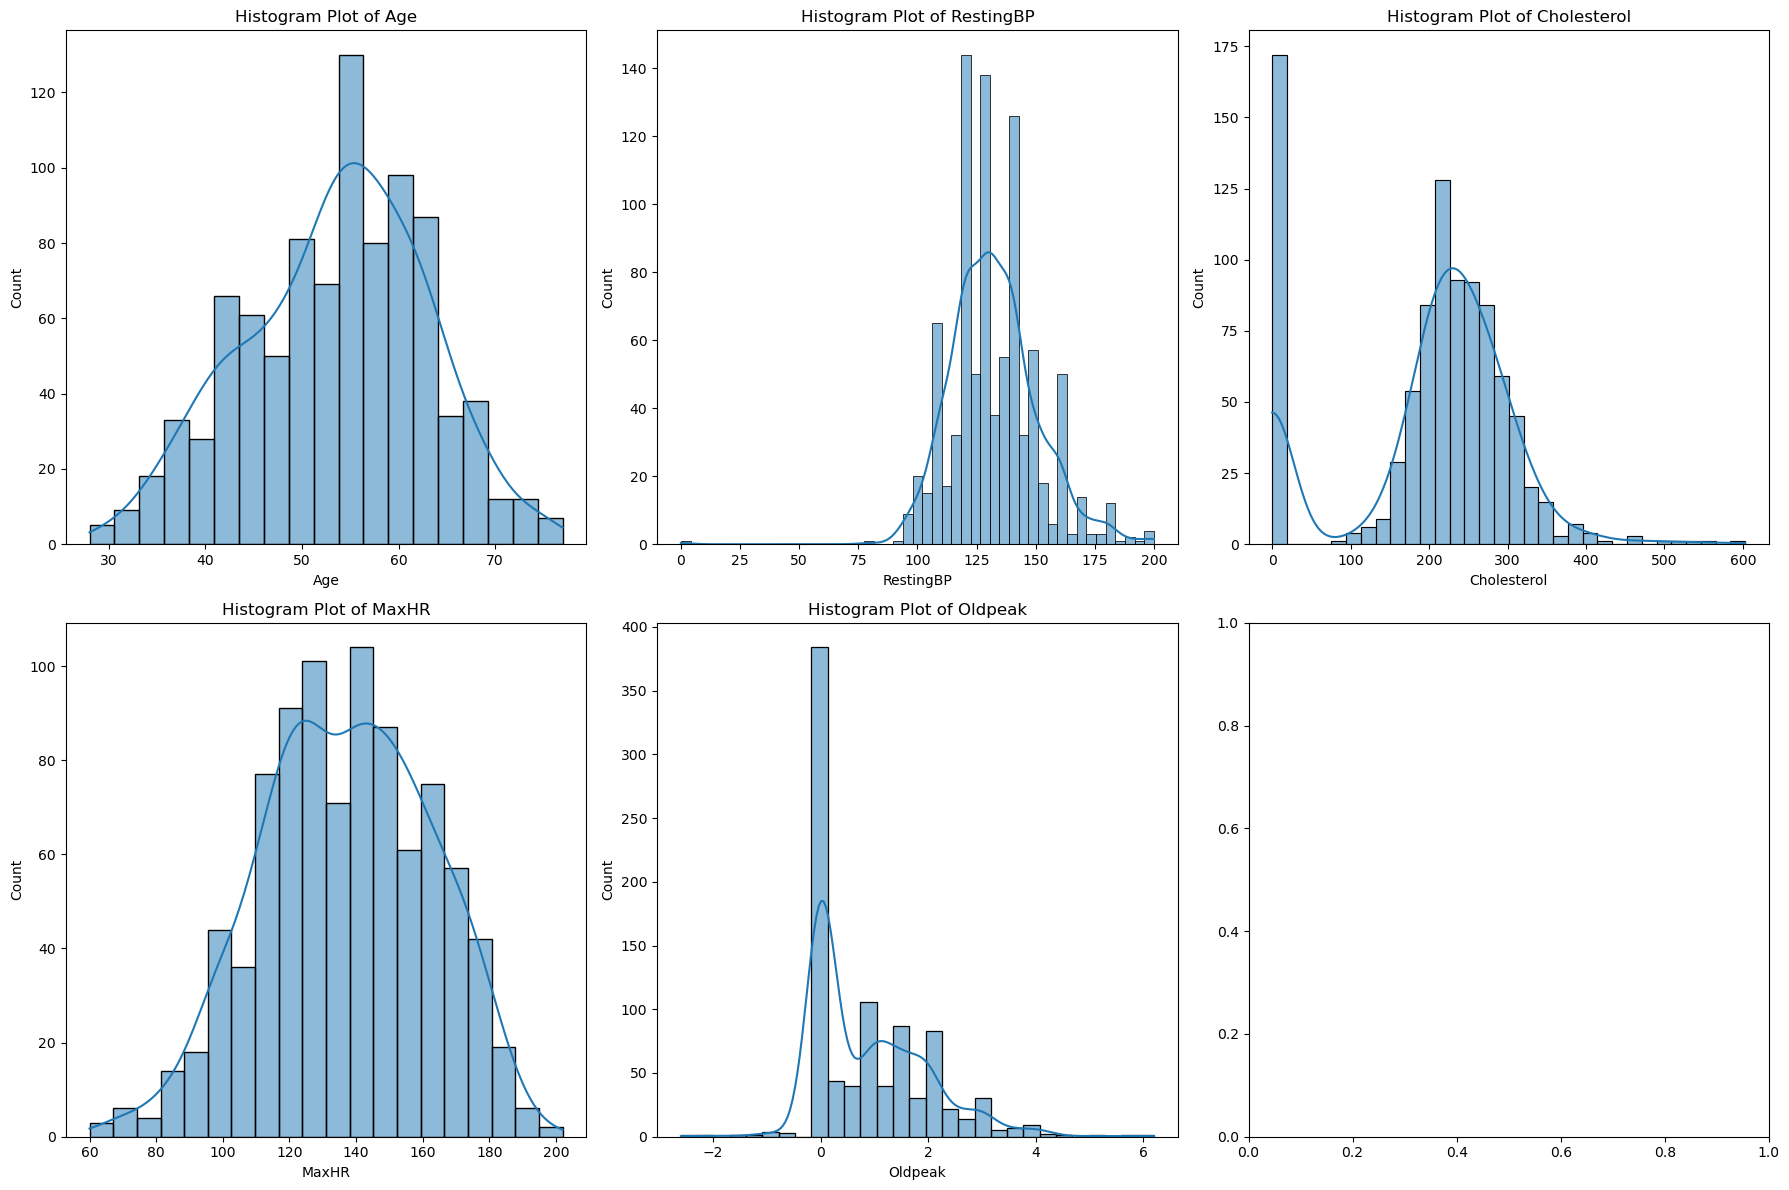

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Numerical columns
numerical_columns = ["Age", "RestingBP", "Cholesterol", "MaxHR", "Oldpeak"]

# Set up subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Loop through numerical columns and plot histogram plots
for i, col in enumerate(numerical_columns):
    sns.histplot(data=df, x=col, kde=True, ax=axes[i // 3, i % 3])
    axes[i // 3, i % 3].set_title(f"Histogram Plot of {col}")

plt.tight_layout()
plt.show()


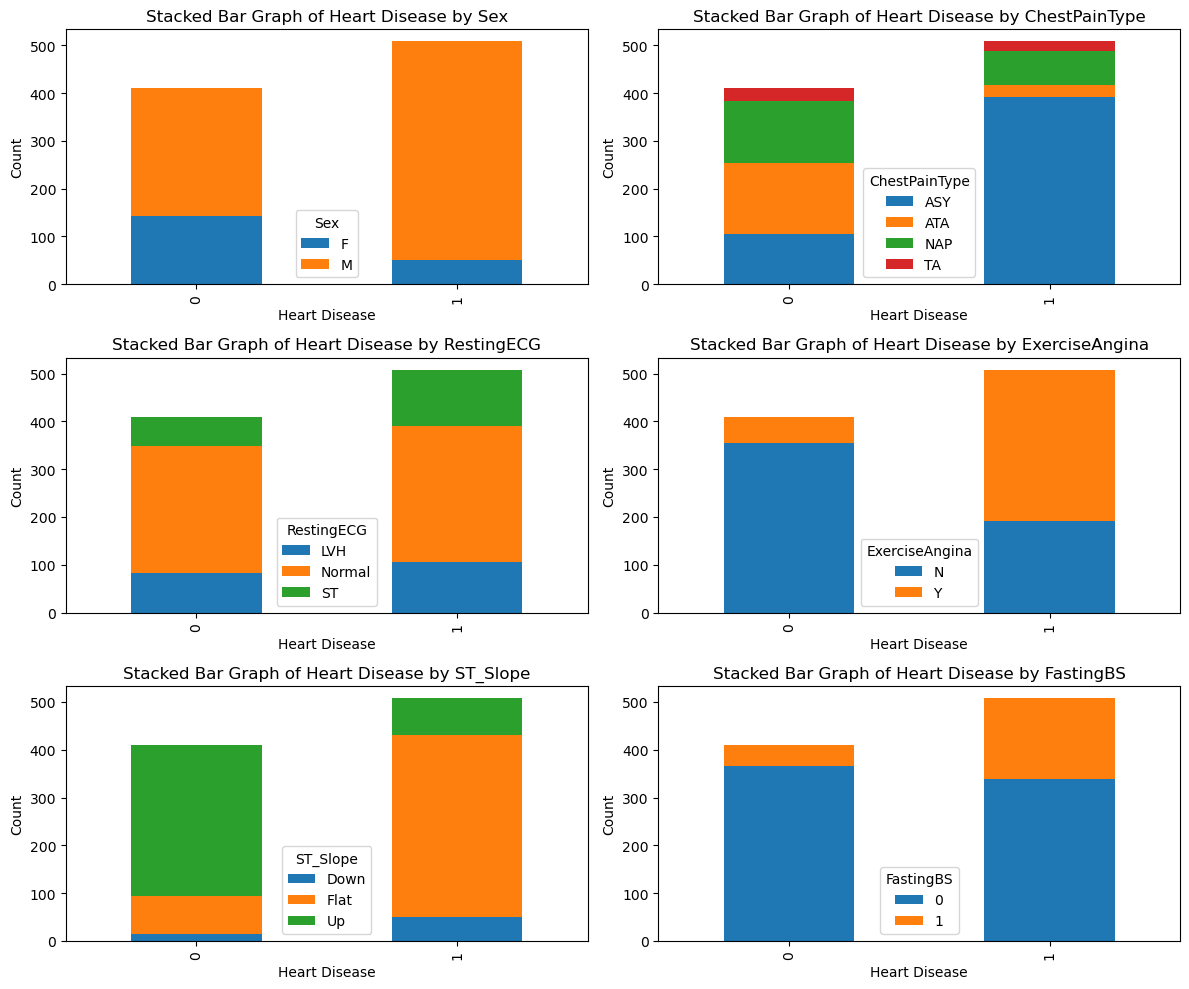

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of categorical columns
categorical_columns = ["Sex", "ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope", "FastingBS"]

# Define the number of columns for display
num_cols = 2

# Calculate the number of rows needed for subplots
num_rows = (len(categorical_columns) + num_cols - 1) // num_cols

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 10))

# Loop through categorical columns and create stacked bar graphs
for i, col in enumerate(categorical_columns):
    row = i // num_cols
    col_num = i % num_cols
    cross_tab = pd.crosstab(df['HeartDisease'], df[col])
    ax = cross_tab.plot(kind='bar', stacked=True, ax=axes[row, col_num])
    ax.set_xlabel('Heart Disease')
    ax.set_ylabel('Count')
    ax.set_title(f'Stacked Bar Graph of Heart Disease by {col}')

# Adjust layout
plt.tight_layout()
plt.show()


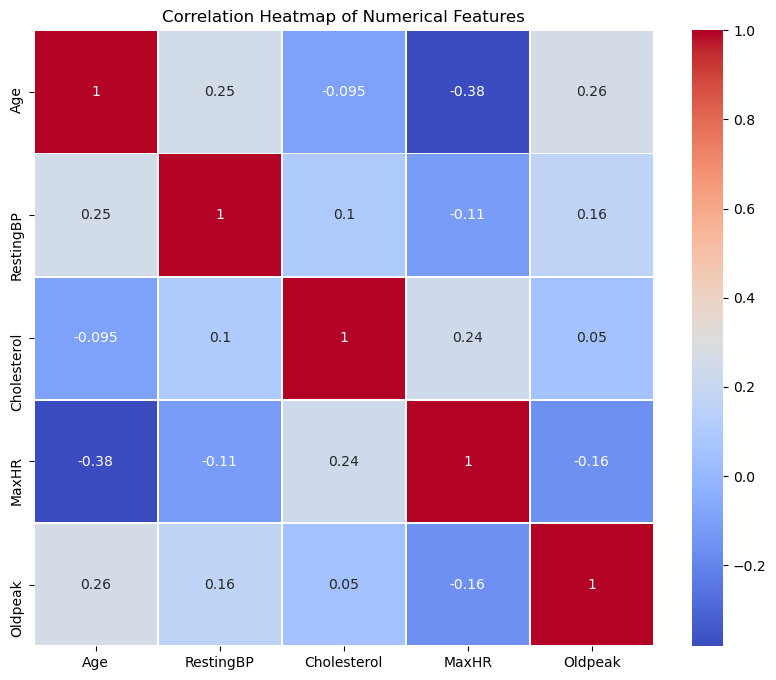

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical features
numerical_features = ["Age", "RestingBP", "Cholesterol", "MaxHR", "Oldpeak"]

# Calculate the correlation matrix
correlation_matrix = df[numerical_features].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


In [16]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


MODELLING

In [17]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['HeartDisease'])
y = df['HeartDisease']

# Split the dataset into training, validation and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=1)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=1)

from sklearn.feature_extraction import DictVectorizer

vectorizer = DictVectorizer(sparse=False)

X_train = vectorizer.fit_transform(X_train.to_dict(orient='records'))
X_val = vectorizer.transform(X_val.to_dict(orient='records'))
X_test = vectorizer.transform(X_test.to_dict(orient='records'))

In [30]:
from sklearn.linear_model import LogisticRegression

# Define and initialize the logistic regression model
log_model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)

# Fit the model to the training data
log_model.fit(X_train, y_train)

# Predict on the training and test data
y_train_pred = log_model.predict(X_train)
y_val_pred = log_model.predict(X_test)

# Calculate accuracy for training and test data
acc_train = accuracy_score(y_train, y_train_pred)
acc_test = accuracy_score(y_val, y_val_pred)

print("Training Accuracy:", round(acc_train, 2))
print("Test Accuracy:", round(acc_test, 2))


Training Accuracy: 0.87
Test Accuracy: 0.88


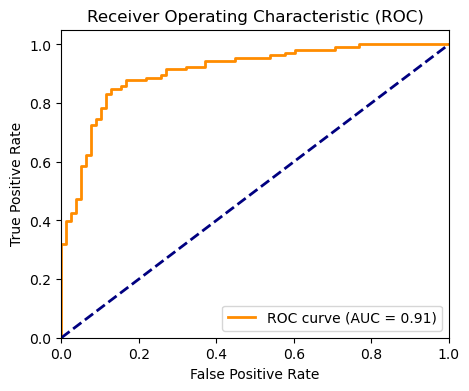

In [28]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt

# Assuming you have a trained logistic regression model named 'model' and X_val and y_val are your test data
y_pred_proba = log_model.predict_proba(X_val)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(5, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
import numpy as np

# Initialize variables to store the best parameters and the highest AUC score
best_max_depth = 0
best_n_estimators = 0
best_auc = 0

# Define a range of values for max_depth and n_estimators to search
max_depth_values = [5, 10, 15, 20]
n_estimators_values = [10, 20, 30, 40]

# Iterate over max_depth and n_estimators combinations
for max_depth in max_depth_values:
    for n_estimators in n_estimators_values:
        # Create a RandomForestClassifier  model with the current parameters
        model = RandomForestClassifier(max_depth=max_depth, n_estimators=n_estimators, random_state=42, n_jobs=-1)
        
        # Train the model on the training data
        model.fit(X_train, y_train)
        
        # Make predictions on the validation data
        y_pred_proba = model.predict_proba(X_val)[:, 1]
        
        # Calculate the AUC score
        auc = roc_auc_score(y_val, y_pred_proba)
        
        # Check if the current AUC score is the best
        if auc > best_auc:
            best_auc = auc
            best_max_depth = max_depth
            best_n_estimators = n_estimators

# Print the best parameters and the highest AUC score
print(f"Best max_depth: {best_max_depth}")
print(f"Best n_estimators: {best_n_estimators}")
print(f"Highest AUC score: {best_auc}")


Best max_depth: 5
Best n_estimators: 30
Highest AUC score: 0.902636671504596


In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve, auc

# Create a Random Forest model with the best parameters
rf_model = RandomForestClassifier(max_depth=best_max_depth, n_estimators=best_n_estimators, random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Predict on the training and test data
y_train_pred = rf_model.predict(X_train)
y_val_pred = rf_model.predict(X_val)

# Calculate accuracy for training and test data
acc_train = accuracy_score(y_train, y_train_pred)
acc_test = accuracy_score(y_val, y_val_pred)

print("Training Accuracy:", round(acc_train, 2))
print("Test Accuracy:", round(acc_test, 2))


Training Accuracy: 0.91
Test Accuracy: 0.88


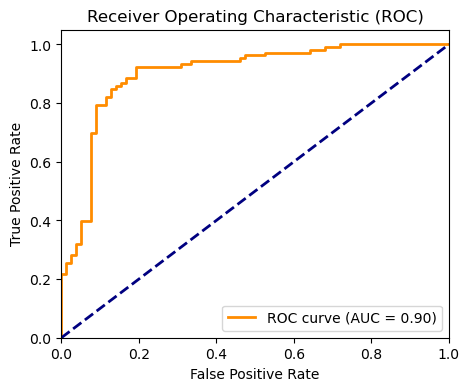

In [33]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt

# Assuming you have a trained logistic regression model named 'model' and X_val and y_val are your test data
y_pred_proba = rf_model.predict_proba(X_val)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(5, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


In [ ]:
# Make predictions on the validation data
y_pred_proba = rf_model.predict_proba(X_val)[:, 1]

# Calculate the AUC score
roc_auc = roc_auc_score(y_val, y_pred_proba)
print(f"AUC score on validation data: {roc_auc:.2f}")

# Plot the ROC curve
fpr, tpr, _ = roc_curve(y_val, y_pred_proba)


plt.figure(figsize=(5,4))
plt.plot(fpr, tpr, color='darkorange', lw=2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.show()


In [ ]:
import xgboost as xgb
from xgboost import DMatrix, train

# Define a parameter grid for hyperparameter tuning
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
}

best_params = None
best_auc = 0

for max_depth in param_grid['max_depth']:
    for learning_rate in param_grid['learning_rate']:
        for n_estimators in param_grid['n_estimators']:
            # Create a DMatrix for training data
            dtrain = DMatrix(X_train, label=y_train)
            # Create a DMatrix for testing data
            dtest = DMatrix(X_val, label=y_val)
            
            # Set hyperparameters
            params = {
                'max_depth': max_depth,
                'learning_rate': learning_rate,
                'n_estimators': n_estimators,
                'objective': 'binary:logistic',
                'eval_metric': 'logloss',
                'nthread': 8,
                'seed': 42
            }

            # Train the XGBoost model
            model = train(params, dtrain, num_boost_round=100)         
            # Make predictions on the validation data
            y_pred_proba = model.predict(dtest)
            
            # Calculate the AUC score
            roc_auc = roc_auc_score(y_val, y_pred_proba)
            
            print(f"max_depth={max_depth}, learning_rate={learning_rate}, n_estimators={n_estimators}, AUC={roc_auc:.2f}")
            
            if roc_auc > best_auc:
                best_auc = roc_auc
                best_params = (max_depth, learning_rate, n_estimators)

print(f"Best hyperparameters: max_depth={best_params[0]}, learning_rate={best_params[1]}, n_estimators={best_params[2]}")
print(f"Highest AUC score: {best_auc:.2f}")


In [ ]:
# Create the best XGBoost model
xgb_model = xgb.XGBClassifier(
    max_depth=best_params[0],
    learning_rate=best_params[1],
    n_estimators=best_params[2],
    random_state=42
)

# Train the best model on the entire dataset
xgb_model.fit(X_train, y_train)

acc_train = accuracy_score(y_train, xgb_model.predict(X_train))
acc_test = accuracy_score(X_val, xgb_model.predict(X_val))

print("Training Accuracy:", round(acc_train, 2))
print("Test Accuracy:", round(acc_test, 2))

# Evaluate the best model on the test set
y_val_pred_proba = xgb_model.predict_proba(X_val)[:, 1]
test_auc = roc_auc_score(y_val, y_val_pred_proba)
print(f"AUC score on test data: {test_auc:.2f}")


In [ ]:
from xgboost import plot_tree

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve, auc

# Make predictions on the test data
y_pred_proba = best_model.predict_proba(X_val)[:, 1]

# Calculate the AUC score
roc_auc = roc_auc_score(y_val, y_pred_proba)
print(f"AUC score on test data: {roc_auc:.2f}")

# Plot the ROC curve
fpr, tpr, _ = roc_curve(y_val, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, roc_auc_score

# Create and train models
logistic_regression = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
logistic_regression.fit(X_train, y_train)

decision_tree = DecisionTreeClassifier(max_depth=5, random_state=42)
decision_tree.fit(X_train, y_train)

rf_model = RandomForestClassifier(max_depth=5, n_estimators=40, random_state=42)
rf_model.fit(X_train, y_train)

xgboost_model = xgb.XGBClassifier(max_depth=5, n_estimators=40, random_state=42, objective='binary:logistic')
xgboost_model.fit(X_train, y_train)

# Evaluate models
models = {
    "Logistic Regression": logistic_regression,
    "Decision Tree": decision_tree,
    "Random Forest": random_forest,
    "XGBoost": xgboost_model
}

results = {}

for model_name, model in models.items():
    y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    auc = roc_auc_score(y_val, model.predict_proba(X_val)[:, 1])
    results[model_name] = {"Accuracy": accuracy, "AUC": auc}

# Print results
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    print(f"Accuracy: {metrics['Accuracy']:.2f}")
    print(f"AUC: {metrics['AUC']:.2f}")
    print()


Based on the accuracy and AUC scores, it appears that the Logistic Regression and Random Forest models are performing the best, with both having high accuracy and AUC scores. However, the AUC score of the XGBoost model is also high, indicating good performance. The Decision Tree model has slightly lower accuracy and AUC compared to the others but still performs reasonably well.

In [ ]:
import pickle

# Assuming that your Random Forest model is named 'rf_model'
# Save the model to a file
with open('random_forest_model.pkl', 'wb') as file:
    model_data = {
        'model': rf_model,
        'vectorizer': vectorizer  # Assuming your DictVectorizer is named 'vectorizer'
    }
    pickle.dump(model_data, file)


In [ ]:
# Load the saved model and DictVectorizer from the file
with open('random_forest_model.pkl', 'rb') as file:
    loaded_model_data = pickle.load(file)

# Retrieve the loaded model and vectorizer
loaded_rf_model = loaded_model_data['model']
loaded_vectorizer = loaded_model_data['vectorizer']


In [ ]:
# Create a sample patient data dictionary
sample_patient_data = {
    'Sex': 'Male',
    'ChestPainType': 'Typical Angina',
    'RestingBP': 130,
    'Cholesterol': 210,
    'FastingBS': 0,
    'RestingECG': 'ST-T wave abnormality',
    'MaxHR': 160,
    'ExerciseAngina': 'No',
    'Oldpeak': 1.2,
    'ST_Slope': 'Upsloping'
}

# Transform the dictionary into a feature vector using the loaded DictVectorizer
sample_patient_vector = loaded_vectorizer.transform([sample_patient_data])

# Make predictions using the loaded Random Forest model
predictions = loaded_rf_model.predict(sample_patient_vector)

# Print the predicted outcome for the sample patient
if predictions[0] == 0:
    print("The patient does not have heart disease.")
else:
    print("The patient has heart disease.")
